In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg

In [2]:
c1=0.4; c2=1-c1; T21=75; T22=80; T11=150; T12=450
N=51
t=np.linspace(0,500,N)

In [3]:
TI_star_1=np.log(2)*T11; TI_star_2=np.log(2)*T12
TI_vect=np.linspace(TI_star_1-30, TI_star_1+30, 61)

In [4]:
#design matrix D
col1=np.ones(N); col2=t
D=np.asarray([col1,col2]).T

In [5]:
def one_D_mono_exp_decay(t, c, tau):
    curve=c*np.exp(-t/tau)
    return(curve)

In [6]:
def one_D_bi_exp_decay(t,c1,c2,tau1,tau2):
    curve=c1*np.exp(-t/tau1)+c2*np.exp(-t/tau2)
    return(curve)

In [7]:
def two_D_bi_exp_decay(t, TI, c1, c2, T21, T22, T11, T12):
    frozen_data=c1* ( 1-2*np.exp(-TI/T11) ) *np.exp(-t/T21)+c2* ( 1-2*np.exp(-TI/T12))*np.exp(-t/T22)
    return(frozen_data)         

In [8]:
def PInv(D):   
    PInv=   np.dot(np.linalg.inv(np.dot(D.T,D)), D.T)
    return(PInv)

In [9]:
data=two_D_bi_exp_decay(t, 120, c1, c2, T21, T22, T11, T12)
if (all(val < 0 for val in data) or all(val > 0 for val in data))==False:
    print('Data changes sign; cannot analyze')
if all(val < 0 for val in data)==True:
    print('Data is negative so will take abs value')
    data=-data

Data is negative so will take abs value


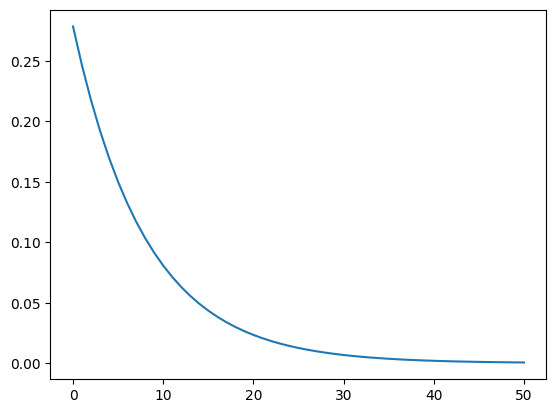

In [10]:
plt.plot(data)

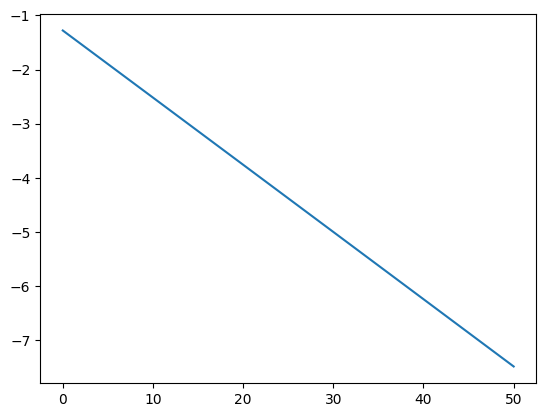

In [11]:
log_data=np.log(data)
plt.plot(log_data)

In [12]:
parms=np.dot(PInv(D),log_data)
coeff=np.exp(parms[0])
tau_const=-1/parms[1]
print(coeff, tau_const)

0.2791131780081399 80.62194640240772


In [13]:
data2=-3*np.exp(-t/310)
log_data2=np.log(-data2)

In [14]:
parms=np.dot(PInv(D),log_data2)
coeff=np.exp(parms[0])
tau_const=-1/parms[1]
print(coeff, tau_const)

3.0000000000000004 310.00000000000006


In [15]:
data_TI=['']*len(TI_vect)
log_data_TI=['']*len(TI_vect)
for kk in range(len(TI_vect)):
#     print(kk)
    data_TI[kk]=two_D_bi_exp_decay(t, TI_vect[kk], c1, c2, T21, T22, T11, T12)
    if (all(val < 0 for val in data_TI[kk]) or all(val > 0 for val in data_TI[kk]))==False:
        pass
#         print('Data changes sign; cannot analyze')
    if all(val < 0 for val in data_TI[kk])==True:
        pass
#         print(f'Data for kk={kk}, TI = {TI_vect[kk]} is all negative so will take abs value\n')
        data_TI[kk]=-data_TI[kk]
    log_data_TI[kk]=np.log(data_TI[kk])

103.97207708399179


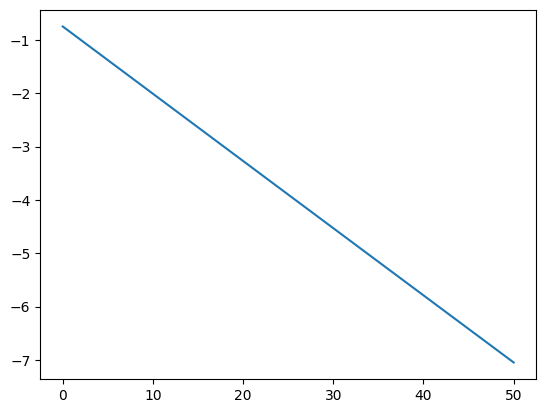

In [16]:
plt.plot(log_data_TI[6])
print(TI_star_1)

In [17]:
coeffs=np.zeros(len(TI_vect)); tau_consts=np.zeros(len(TI_vect))
print(f'Nulling value for TI = {TI_star_1}')
for kk in range(len(TI_vect)):
    parms=np.dot(PInv(D),log_data_TI[kk])
    coeffs[kk]=np.exp(parms[0])
    tau_consts[kk]=-1/parms[1]
#     print(kk, TI_vect[kk],coeffs[kk], tau_consts[kk])

Nulling value for TI = 103.97207708399179


Text(0, 0.5, 'Derived T22')

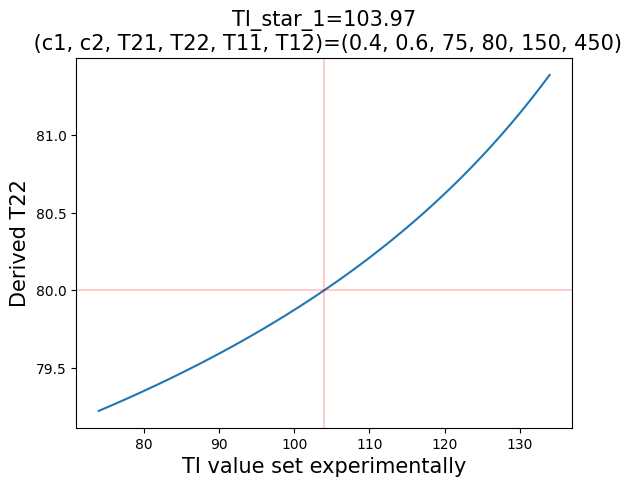

In [18]:
plt.plot(TI_vect,tau_consts)
plt.title(f'TI_star_1={np.round(TI_star_1,2)}\n (c1, c2, T21, T22, T11, T12)={c1,c2,T21,T22,T11,T12}', fontsize=15, color='black')
plt.axhline(y = T22, color = 'r', linestyle = '-', alpha=0.2)
plt.axvline(x=TI_star_1, color='r', linestyle = '-', alpha=0.2)
plt.xlabel("TI value set experimentally", fontsize=15)
plt.ylabel('Derived T22',fontsize=15)

Text(0, 0.5, 'Percent error in Derived T22')

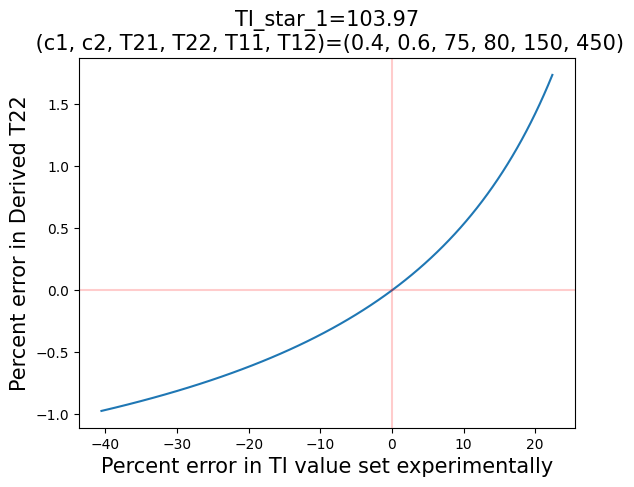

In [19]:
TI_vect_percent=(TI_vect-TI_star_1)/TI_vect*100
tau_consts_percent=(tau_consts-T22)/T22*100
plt.plot(TI_vect_percent,tau_consts_percent)
plt.title(f'TI_star_1={np.round(TI_star_1,2)}\n (c1, c2, T21, T22, T11, T12)={c1,c2,T21,T22,T11,T12}', fontsize=15, color='black')
plt.axhline(y = 0, color = 'r', linestyle = '-', alpha=0.2)
plt.axvline(x=0, color='r', linestyle = '-', alpha=0.2)
plt.xlabel("Percent error in TI value set experimentally", fontsize=15)
plt.ylabel('Percent error in Derived T22',fontsize=15)
